# Исследование популярного сервиса аренды самокатов XXX.

Вы аналитик популярного сервиса аренды самокатов XXX. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса XXX пользуются мобильным приложением. Сервисом можно пользоваться:

    без подписки
      
        абонентская плата отсутствует;
        стоимость одной минуты поездки — 88 рублей;
        стоимость старта (начала поездки) — 5050 рублей;
    с подпиской Ultra
      
        абонентская плата — 199199 рублей в месяц;
        стоимость одной минуты поездки — 66 рублей;
        стоимость старта — бесплатно.
**Цель исследования:**

    1. Посчитать помесячную и общую выручку из предоставленных данных.
    2. Провести сравнение пользователей с подпиской и без подписки.
    
**Ход исследования:**

    Данные располагаются в трех файлах '/datasets/users_go.csv', '/datasets/rides_go.csv', '/datasets/subscriptions_go.csv'. Достану их и изучу общую информацию.
    
    Выполню предобработку данных, приведя столбец date к типу datetime, создав из него столбец месяца, а затем проверю данные на дубли. Далее, объединю таблицы в одну, создам из них необходимые таблицы, и приступлю к проведению анализа.
    
    Таким образом, мое исследование пройдет в семь этапов(включая дополнительеный):
        - Загрузка данных
        - Предобработка данных
        - Исследовательский анализ данных
        - Объединение данных
        - Подсчёт выручки
        - Проверка гипотез
        - Распределения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')

In [3]:
display(users.head(10))
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides = pd.read_csv('/datasets/rides_go.csv')

In [5]:
display(rides.head(10))
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [7]:
display(subscriptions.head(10))
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Вывод:**

    - Были выгружены данные из трех разных файлов в три переменные.
    - В таблице users 1565 записей с колонками идентификатора пользователя, именем, возрастом, городом, типом подписки.
    - В таблице rides 18068 записей с колонками идентификатора пользователя, дистанцией, продолжительностью и датой поездки.
    - В таблице subscriptions 2 записи с колонками типа подписки, цену за минуту, цену за старт поездки и цену за подписку.

#### Шаг 2. Предобработка данных

In [8]:
print("====USERS: \n", users.isna().sum())
print("====RIDES: \n", rides.isna().sum())
print("====SUBS: \n", subscriptions.isna().sum())

====USERS: 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
====RIDES: 
 user_id     0
distance    0
duration    0
date        0
dtype: int64
====SUBS: 
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [9]:
try:
    rides['date'] = pd.to_datetime(rides['date'])
except:
    print("Can't convert date to datetime type")
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [10]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [11]:
rides['date'].dt.year.unique()
rides['date'].dt.month.sort_values().unique()
rides['date'].dt.day.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [12]:
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [13]:
print("USERS(DUBL): ", users.duplicated().sum())
print("RIDES(DUBL): ", rides.duplicated().sum())
print("SUBS(DUBL): ",subscriptions.duplicated().sum())

USERS(DUBL):  31
RIDES(DUBL):  0
SUBS(DUBL):  0


In [14]:
users = users.drop_duplicates()

In [15]:
users.duplicated().sum()

0

In [16]:
users.nunique()

user_id              1534
name                  194
age                    29
city                    8
subscription_type       2
dtype: int64

In [17]:
rides.nunique()

user_id      1534
distance    18068
duration    17974
date          364
month          12
dtype: int64

In [18]:
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [19]:
users['name'].sort_values().unique()

array(['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра',
       'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина',
       'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий',
       'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина',
       'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём',
       'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия',
       'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника',
       'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад',
       'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод',
       'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей',
       'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила',
       'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий',
       'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена',
       'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар',
       'Злата', 

In [20]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

**Вывод:**

    - Был приведен тип date к datetime
    - Дубликаты нашлись только в таблице users и были упразднены
    - Был выделен столбец с месяцев из даты
    - Остальные значения в таблицах были признаны без аномалий

#### Шаг 3. Исследовательский анализ данных

**Частота встречаемости городов:**

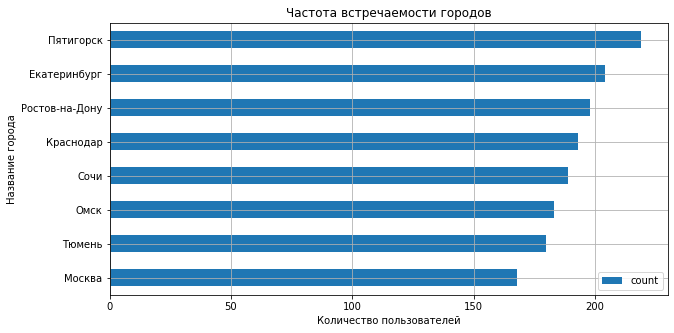

In [21]:
cities = users.pivot_table(index='city', values='user_id', aggfunc=['count'])
cities.columns = ['count']
cities.sort_values('count').plot(kind='barh', y='count', figsize=(10, 5), grid=True)

plt.title('Частота встречаемости городов')
plt.legend()
plt.xlabel('Количество пользователей')
plt.ylabel('Название города')
plt.show()

Как видно по графику, чаще всего встречается город Пятигорск, то есть в нем больше всего пользователей(>200). Меньше же всего пользователей в Москве(что необычно для сервиса самокатов, вероятно в столице большая часть пользователей у конкурентов).

**Cоотношение пользователей с подпиской и без подписки:**

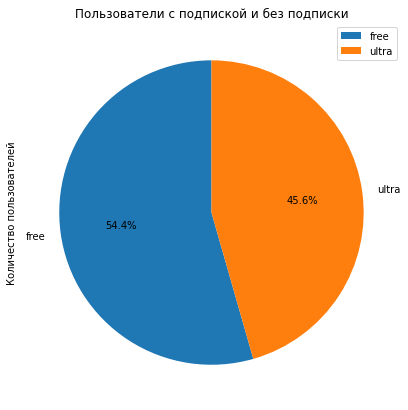

In [22]:
pivot = users.pivot_table(index='subscription_type', values='user_id', aggfunc=['count'])
pivot.columns = ['count']

# Вычисляем доли
total = pivot['count'].sum()
pivot['Количество пользователей'] = pivot['count'] / total

# Строим круговую диаграмму
pivot['Количество пользователей'].plot(kind='pie', autopct='%.1f%%', figsize=(10, 7), startangle=90)
plt.title('Пользователи с подпиской и без подписки')
plt.legend()
plt.show()

Больше всего пользователей без подписки.

**Возраст пользователей:**

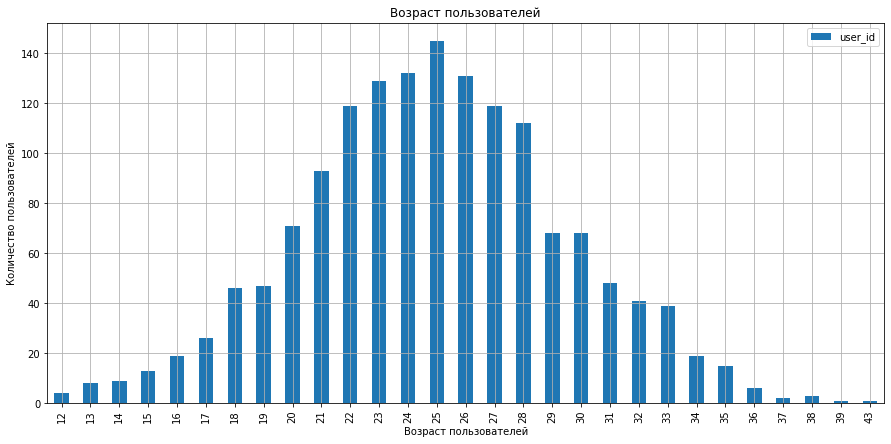

In [23]:
users.pivot_table(index='age', values='user_id', aggfunc=['count']).plot(kind='bar', y='count', figsize=(15, 7), grid=True)
plt.title('Возраст пользователей')
plt.legend()
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст пользователей')
plt.show()

Как видно, возраст пользователей начинается от 12, заканчивается 43 и распределен нормально.

**Расстояние, которое пользователь преодолел за одну поездку:**

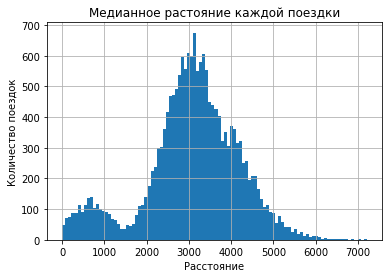

In [24]:
#rides.pivot_table(index='user_id', values='distance', aggfunc='median').hist(bins=50)
plt.hist(rides['distance'], bins=100)
plt.grid(True)
plt.title('Медианное растояние каждой поездки')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

3133.6099936787664


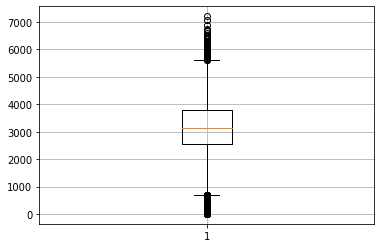

In [25]:
#print(rides.pivot_table(index='user_id', values='distance', aggfunc='median').mean())
#rides.pivot_table(index='user_id', values='distance', aggfunc='median').boxplot()
print(rides['distance'].median())
plt.boxplot(rides['distance'])
plt.grid(True)

По медиане дистанции каждого пользователя, он проезжает 3.1км. По графикам видно, что минимальные значения располагаются около 2900 метров, а максимальные около 3300. Также имеется множество выбросов, сверху и снизу ящика с усами. По гистограмме видно нормальное распределение.

**Продолжительность поездок:**

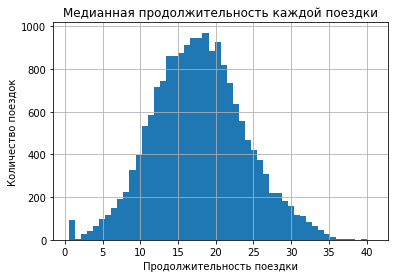

In [26]:
#rides.pivot_table(index='duration', values='user_id', aggfunc='median').sort_values(by='duration').plot(kind='bar', figsize=(15,10), grid=True)
plt.hist(rides['duration'], bins=50)
plt.title('Медианная продолжительность каждой поездки')
plt.grid(True)
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

17.678394530393803


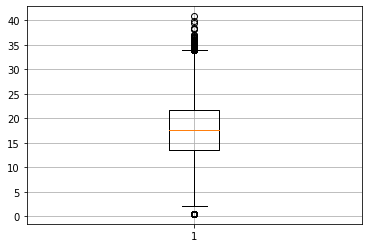

In [27]:
#rides.pivot_table(index='user_id', values='duration', aggfunc='median').boxplot()
print(rides['duration'].median())
plt.boxplot(rides['duration'])
plt.grid(True)

Медиана продолжительности поездки пользователя 17.6 минут. Графики показывают, что минимальное значение продолжительностии лежит около 14 минут, а максимальная около 22. Также имеется несколько выбросов, как сверху, так и снизу графика ящика с усами. По гистограмме видим нормальное распределение.

**Вывод:**
    
    - Чаще всего встречается город Пятигорск, то есть в нем больше всего пользователей(>200). Меньше же всего пользователей в Москве(что необычно для сервиса самокатов, вероятно в столице большая часть пользователей у конкурентов).
    - Больше всего пользователей без подписки.
    - Как видно, возраст пользователей начинается от 12, заканчивается 43 и распределен нормально.
    - По медиане дистанции каждого пользователя, он проезжает 3.1км. По графикам видно, что минимальные значения располагаются около 2900 метров, а максимальные около 3300. Также имеется множество выбросов, сверху и снизу ящика с усами. По гистограмме видно нормальное распределение.
    - Медиана продолжительности поездки пользователя 17.6 минут. Графики показывают, что минимальное значение продолжительностии лежит около 14 минут, а максимальная около 22. Также имеется несколько выбросов, как сверху, так и снизу графика ящика с усами. По гистограмме видим нормальное распределение.

#### Шаг 4. Объединение данных

In [28]:
users_rides = users.merge(rides, on='user_id')
users_rides = users_rides.merge(subscriptions, on='subscription_type')
print("RIDES: ", rides['user_id'].count(), "FINALIZE TABLE: ", users_rides['user_id'].count())

RIDES:  18068 FINALIZE TABLE:  18068


In [29]:
subs = users_rides.query('subscription_type == "ultra"')
unsubs = users_rides.query('subscription_type == "free"')
print("SUBS: ", subs['user_id'].count(), "UNSUBS: ", unsubs['user_id'].count(), "SUM: ", subs['user_id'].count()+unsubs['user_id'].count())
print("USERS_RIDES: ", users_rides['user_id'].count())

display("USER_RIDES: ", users_rides.head(5))
display("SUBS: ", subs.head(5))
display("UNSUBS: ", unsubs.head(5))

SUBS:  6500 UNSUBS:  11568 SUM:  18068
USERS_RIDES:  18068


'USER_RIDES: '

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


'SUBS: '

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


'UNSUBS: '

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Данные были объединены по полю user_id и subscription_type.

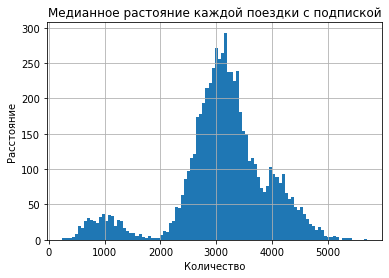

3148.6372291760854

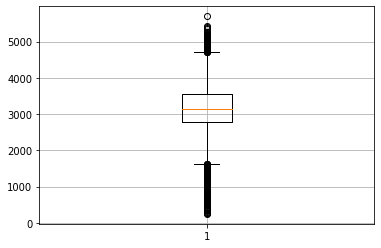

In [30]:
#subs.pivot_table(index='month', values='distance', aggfunc='median').sort_values(by='distance').plot(kind='bar', figsize=(15, 7), grid=True)
plt.hist(subs['distance'], bins=100)
plt.title('Медианное растояние каждой поездки с подпиской')
plt.grid(True)
plt.ylabel('Расстояние')
plt.xlabel('Количество')
plt.show()

#subs.pivot_table(index='month', values='distance', aggfunc='median').boxplot()
plt.boxplot(subs['distance'])
plt.grid(True)
subs['distance'].median()

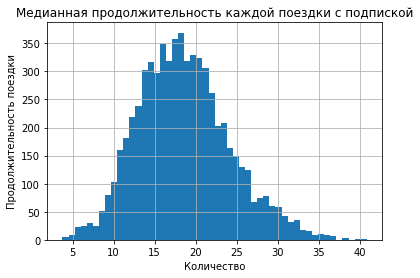

18.17815320055055

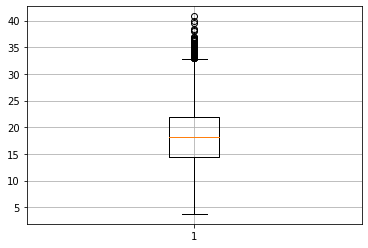

In [31]:
#subs.pivot_table(index='month', values='duration', aggfunc='median').sort_values(by='duration').plot(kind='bar', figsize=(15,7), grid=True)
plt.hist(subs['duration'], bins=50)
plt.title('Медианная продолжительность каждой поездки с подпиской')
plt.grid(True)
plt.ylabel('Продолжительность поездки')
plt.xlabel('Количество')
plt.show()

#subs.pivot_table(index='month', values='duration', aggfunc='median').boxplot()
plt.boxplot(subs['duration'])
plt.grid(True)
subs['duration'].median()

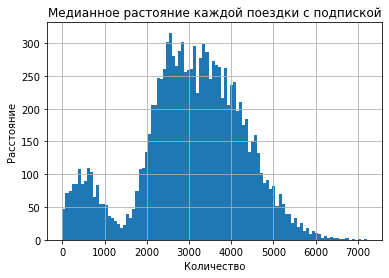

3114.648464847295

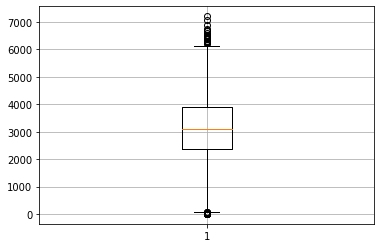

In [32]:
#unsubs.pivot_table(index='month', values='distance', aggfunc='median').sort_values(by='distance').plot(kind='bar', figsize=(15, 7), grid=True)
plt.hist(unsubs['distance'], bins=100)
plt.title('Медианное растояние каждой поездки с подпиской')
plt.grid(True)
plt.ylabel('Расстояние')
plt.xlabel('Количество')
plt.show()

plt.boxplot(unsubs['distance'])
plt.grid(True)
unsubs['distance'].median()

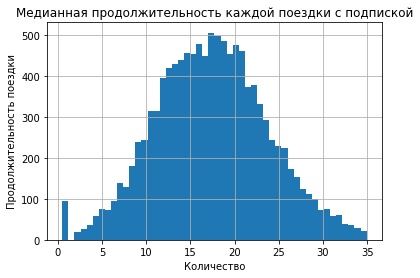

17.326890226082043

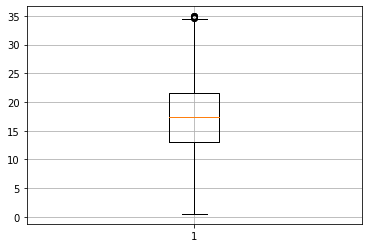

In [33]:
plt.hist(unsubs['duration'], bins=50)
plt.title('Медианная продолжительность каждой поездки с подпиской')
plt.grid(True)
plt.ylabel('Продолжительность поездки')
plt.xlabel('Количество')
plt.show()

plt.boxplot(unsubs['duration'])
plt.grid(True)
unsubs['duration'].median()

**Вывод:**
    
    - Данные были объединены по полю user_id и subscription_type.
    - По графикам видно, что пользователи c подпиской проезжают большее расстояние(медиана с подпиской = 3148, без 3114) и дольше по продолжительности(18.1 в среднем с подпиской и 17.3 без) в поездке.

#### Шаг 5. Подсчёт выручки

In [34]:
#users_rides.isna().sum()

In [35]:
users_rides['duration'] = np.ceil(users_rides['duration']) # добавил округление

user_ride_months = users_rides.pivot_table(
    index=('user_id', 'month'), 
    values=[
        'user_id', 'name', 'age', 
        'city', 'subscription_type', 'distance',
       'duration', 'date', 'month', 
        'minute_price', 'start_ride_price', 'subscription_fee'
    ], 
    aggfunc={
        'distance':{'count', 'sum'}, 
        'duration':'sum', 
        'minute_price': 'mean',
        'start_ride_price':'mean',
        'subscription_fee':'mean',
    }
)
user_ride_months.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']

In [36]:
display(user_ride_months.isna().sum())

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

In [37]:
user_ride_months['revenue'] = np.ceil(
    user_ride_months['start_ride_price']*user_ride_months['count']+
    user_ride_months['minute_price']*user_ride_months['duration']+
    user_ride_months['subscription_fee']
)
print(user_ride_months['revenue'].sum())
user_ride_months

3878641.0


count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
...              ...           ...       ...           ...               ...   
1534    6          2   3409.468534      26.0             8                50   
        8          2   7622.453034      48.0             8                50   
        9          1   4928.173852      23.0             8                50   
        11         4  13350.015305      78.0             8                50   
        12         1   2371.711192      16.0             8                50   

               subscription_fee  revenue  
user_id month                             
1       1                   199    451.0  
        4                   199    241.0  
        8                   199    475.0  
        10                  199    391.0  
        11                  199    535.0  
...                         ...      ...  
1534    6                     0    308.0  
        8                     0    484.0  
        9                     0    234.0  
        11                    0    824.0  
        12                    0    178.0  

[11331 rows x 7 columns]

**Вывод:**
    
    - Была сформирована новая таблица с суммарным расстоянием, количеством поездок и суммарным времем для каждого пользователя за каждый месяц.
    - Был посчитан столбец для выручки по формуле - стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.
    - Общая выручка составила 3878641.0

#### Шаг 6. Проверка гипотез

**Тратят ли пользователи с подпиской больше времени на поездки:**

H₀ - средняя продолжительность поездок пользователей с подпиской и без равны

H1 - средняя продолжительность поездок пользователей с подпиской больше чем пользователей без подписки

In [38]:
duration_sub = subs['duration']
duration_unsub = unsubs['duration']

print("mean sub: ", duration_sub.mean())
print("mean unsub: ", duration_unsub.mean())

alpha = 0.05

duration_results = st.ttest_ind(
    duration_sub,
    duration_unsub,
    equal_var=True,
    alternative='greater'
)

print("p-value: ", duration_results.pvalue)

if duration_results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о том, что пользователи с подпиской тратят больше времени на поездки")
else:
    print("Не получилось отвергуть нулевую гипотезу")

mean sub:  18.54198516280583
mean unsub:  17.39090929866399
p-value:  1.2804098316645618e-34
Отвергаем нулевую гипотезу о том, что пользователи с подпиской тратят больше времени на поездки


Гипотезу о том, что пользователи с подпиской тратят времени на поездки больше, чем пользователи без подписки отвергаем.

**Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров:**

H₀ - средняя дистанция поездок пользователей с подпиской равна 3130 метров

H1 - средняя дистанция поездок пользователей с подпиской больше 3130 метров

In [39]:
distance_sub = subs['distance']

print("mean sub: ", distance_sub.mean())

distance_value = 3130
alpha = 0.05

distance_results = st.ttest_1samp(
    distance_sub,
    distance_value,
    alternative='greater'
)

print("p-value: ", distance_results.pvalue)

if distance_results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергуть нулевую гипотезу")

mean sub:  3115.4453880370247
p-value:  0.9195368847849785
Не получилось отвергуть нулевую гипотезу


Отвергнуть гипотезу о том, что расстояние одной поездки пользователя с подпиской не превышает 3130 метров, не удалось.

**Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки:**

H₀ - средняя помесячная выручка поездок пользователей с подпиской равна средней помесячной выручке поездок пользователей без подписки

H1 - средняя помесячная выручка поездок пользователей с подпиской больше средней помесячной выручке поездок пользователей без подписки.

In [40]:
revenue_sub = user_ride_months.loc[user_ride_months['subscription_fee'] > 0, 'revenue']
revenue_unsub = user_ride_months.loc[user_ride_months['subscription_fee'] == 0]['revenue']

print("mean sub: ", revenue_sub.mean())
print("mean unsub: ", revenue_unsub.mean())

alpha = 0.05

revenue_results = st.ttest_ind(
    revenue_sub,
    revenue_unsub,
    equal_var=True,
    alternative='greater'
)

print("p-value: ", revenue_results.pvalue)

if revenue_results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергуть нулевую гипотезу")

mean sub:  362.7921906022502
mean unsub:  328.6413651073845
p-value:  1.8850394384715216e-31
Отвергаем нулевую гипотезу


Гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки, отвергнута.

**Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.**

Для подобной ситуации мы имеем два набора данных, которые зависят друг от друга(один был до события, другой после). То есть две зависимые выборки. Для этой ситуации нам подойдет t-тест для зависимых выборок - _st.ttest_rel_ с параметрами: первый _выборка до события(обновление сервера)_, второй _выборка после события_ и третий _alternative='less'_(так как мы хотим узнать, что обращения снизились).

**Вывод:**

    - Гипотезу о том, что пользователи с подпиской тратят времени на поездки больше, чем пользователи без подписки отвергаем.
    - Отвергнуть гипотезу о том, что расстояние одной поездки пользователя с подпиской не превышает 3130 метров, не удалось.
    - Гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки, отвергнута.
    - Была разобрана гипотетическая ситуация в которой мы имеем два набора данных, которые зависят друг от друга(один был до события, другой после). То есть две зависимые выборки. Для этой ситуации нам подойдет t-тест для зависимых выборок - st.ttest_rel с параметрами: первый выборка до события(обновление сервера), второй выборка после события и третий alternative='less'(так как мы хотим узнать, что обращения снизились).

#### Шаг 7. Распределения

**Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 
Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.**

0.049600981640267626 1118 95


<BarContainer object of 1119 artists>

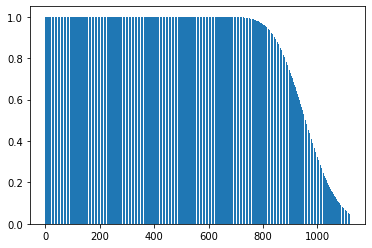

In [41]:
from scipy.stats import binom, norm

n = 0
p = 0.1 # подписку продлевают 10% пользователей
k = 95 # 5% не выполнение плана, значит 95 на его выполнение

distr = []

prob = binom.cdf(k, n, p)
distr.append(prob)

while prob > 0.05: # 5% на невыполнение плана
    n+=1
    
    prob = binom.cdf(k, n, p)
    distr.append(prob)

print(prob, n, k)

plt.bar(range(0, len(distr)), distr)

Итого были выбраны параметры p = 0.1 так как подписку продлевают 10% пользователей, а k = 95 так как мы должны с таким шансом выполнить план с такой вероятностью. Итого получается, что при 1118 разосланных бесплатных подписок есть вероятность 95% выполнение плана.

**Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 11 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

In [42]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

Условие выполняется


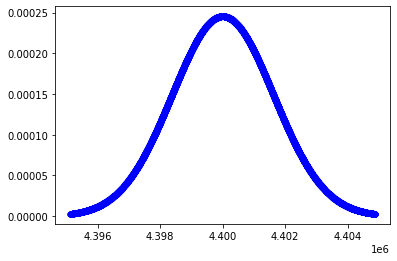

In [43]:
from math import sqrt

n = 11000000
p = 0.4
k = 399500
mu = n * p
sigma = sqrt(n * p * (1 - p))

left = int(n * p - 3 * sqrt(n * p * (1 - p)))
right = int(n * p + 3 * sqrt(n * p * (1 - p)))

x = list(range(max(0, left), right))

ax = plt.subplot()

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, label='вероятности биномиального распределения')

if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

Условие того, что уведомление откроют не более 399,5 тыс. пользователей выполняется.

**Вывод:**

    - При 1118 разосланных бесплатных подписок есть вероятность 95% выполнение плана.
    - Условие того, что уведомление откроют не более 399,5 тыс. пользователей выполняется.

В процессе исследования сервиса аренды самокатов GoFast были выполнены следующие этапы и сделаны выводы:

**Выполнена предобработка данных:**

    - Был приведен тип date к datetime
    - Дубликаты нашлись только в таблице users и были упразднены
    - Был выделен столбец с месяцев из даты
    - Остальные значения в таблицах были признаны без аномалий
    
**Проведен исследовательский анализ данных:**

    - Чаще всего встречается город Пятигорск, то есть в нем больше всего пользователей(>200). Меньше же всего пользователей в Москве(что необычно для сервиса самокатов, вероятно в столице большая часть пользователей у конкурентов).
    - Больше всего пользователей без подписки.
    - Как видно, возраст пользователей начинается от 12, заканчивается 43 и распределен нормально.
    - По медиане дистанции каждого пользователя, он проезжает 3.1км. По графикам видно, что минимальные значения располагаются около 2900 метров, а максимальные около 3300. Также имеется множество выбросов, сверху и снизу ящика с усами. По гистограмме видно нормальное распределение.
    - Медиана продолжительности поездки пользователя 17.6 минут. Графики показывают, что минимальное значение продолжительностии лежит около 14 минут, а максимальная около 22. Также имеется несколько выбросов, как сверху, так и снизу графика ящика с усами. По гистограмме видим нормальное распределение.
    
**Объединение данных:**

    - Данные были объединены по полю user_id и subscription_type.
    - По графикам видно, что пользователи c подпиской проезжают большее расстояние(медиана с подпиской = 3148, без 3114) и дольше по продолжительности(18.1 в среднем с подпиской и 17.3 без) в поездке.
    
**Подсчёт выручки:**

    - Была сформирована новая таблица с суммарным расстоянием, количеством поездок и суммарным времем для каждого пользователя за каждый месяц.
    - Был посчитан столбец для выручки по формуле - стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.
    - Общая выручка составила 3878641.0
    
**Проверка гипотез:**

    - Гипотезу о том, что пользователи с подпиской тратят времени на поездки больше, чем пользователи без подписки отвергаем.
    - Отвергнуть гипотезу о том, что расстояние одной поездки пользователя с подпиской не превышает 3130 метров, не удалось.
    - Гипотеза о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки, отвергнута.
    - Была разобрана гипотетическая ситуация в которой мы имеем два набора данных, которые зависят друг от друга(один был до события, другой после). То есть две зависимые выборки. Для этой ситуации нам подойдет t-тест для зависимых выборок - st.ttest_rel с параметрами: первый выборка до события(обновление сервера), второй выборка после события и третий alternative='less'(так как мы хотим узнать, что обращения снизились).
    
**Распределения:**

    - При 1118 разосланных бесплатных подписок есть вероятность 95% выполнение плана.
    - Условие того, что уведомление откроют не более 399,5 тыс. пользователей выполняется.
  
**Рекомендации:**

    - Пользователи с подпиской действительно приносят больше дохода, чем пользователи без нее. Советую принять меры по привлечению пользователей к подписке. Например привлечение пользователей через бесплатный месяц подписки.